In [45]:
#import libraries 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#read people data
people_df = pd.read_csv("people_cleaned_0402.tsv", sep = "\t")
people_df['award'].value_counts()

-9                                                                                 121674
nobel                                                                                 125
2002 Award for Meritorious Contributions to Neuropathology                              3
Nobel                                                                                   2
2000 Award for Meritorious Contributions to Neuropathology 1992 AANP President          1
2006 ISNV Pioneer in NeuroVirology Award                                                1
2011 AANP President                                                                     1
National Medal of Science                                                               1
2009 Award for Meritorious Contributions to Neuropathology                              1
1991 Award for Meritorious Contributions to Neuropathology                              1
1999 (first) ISNV Pioneer in NeuroVirology Award                                        1
1997 Award

We have 125 nobel prize winners in the data set, which I think is a good sign but the column does not specify the field (physiology? medicine?). https://www.nobelprize.org/prizes/lists/all-nobel-prizes/

In [4]:
#read relation data
rel_df = pd.read_csv("relation_cleaned_0402.tsv", sep='\t')
rel_df.head(10)

,Unnamed: 0,cid,pid1,pid2,relation,location,locid,department,startdate,stopdate,addedby,dateadded
0,0,2,2,3,1,"university of california, berkeley",312,-9,2000-00-00,2005-00-00,david,2005-01-15 17:33:57
1,1,3,4,3,2,"university of california, berkeley",312,-9,2003-00-00,2006-00-00,david,2005-01-15 17:35:17
2,2,5,6,3,1,"university of california, berkeley",312,-9,2002-00-00,2008-00-00,david,2005-01-15 19:02:54
3,3,6,18761,9,1,"university of california, berkeley",312,-9,0000-00-00,1984-00-00,david,2005-01-15 19:06:16
4,4,7,10,16,2,"washington university, saint louis",497,-9,0000-00-00,0000-00-00,david,2005-01-15 19:06:58
5,5,8,3,16,2,"washington university, saint louis",497,-9,0000-00-00,0000-00-00,david,2005-01-15 19:07:44
6,6,9,3,26,1,yale university,507,-9,0000-00-00,0000-00-00,david,2005-01-15 19:09:19
7,7,10,11,10,1,johns hopkins university,117,-9,0000-00-00,2006-00-00,david,2015-09-11 16:05:34
8,8,11,12,10,1,johns hopkins university,117,-9,0000-00-00,2004-00-00,david,2015-09-11 16:05:28
9,9,12,13,10,1,johns hopkins university,117,-9,0000-00-00,2001-00-00,david,2015-09-11 16:05:21


Here I make a frequency table for the pairs of startdate - stopdate. something looks like 2 by 2 tables according to whether the cell is a missing (= "0000-00-00") or not 

|      |   | Start | Date |
|------|---|-------|------|
|      |   |   O   |   X  |
| Stop  | O |       |      |
| Date | X |       |      |

In [6]:
rel_df['start_missing'] = np.where(rel_df['startdate'] == "0000-00-00", "missing", "exist")
rel_df['stop_missing'] = np.where(rel_df['stopdate'] == "0000-00-00", "missing", "exist")
rel_df[['start_missing', 'stop_missing']].head(20)

pd.crosstab(rel_df.start_missing, rel_df.stop_missing,  margins=True, normalize = True)

stop_missing,exist,missing,All
start_missing,,,
exist,0.143518,0.057186,0.200704
missing,0.380952,0.418345,0.799296
All,0.524469,0.475531,1.000000


Lots of cells are missing.... but 52% entries have stopdate at least.. only 14% entries have the both start and the end date. The imputation should be one of the main objectives of preprocessing.

In [11]:
# couting department and location from relation data 

rel_loc_id = rel_df['locid'].value_counts()
rel_loc_str = rel_df['location'].value_counts()
print(len(rel_loc_id))
print(len(rel_loc_str))

12025
11948


Some discrepancies between the location string and locid but it does not appear serious as one we saw in people data. And more than 12,000 institutions are identified from the relation data. I think some types of filtering is required later, defintely...

In [18]:
rel_loc_str.head(50)

-9                                               0.035818
university of california, los angeles            0.012440
stanford university                              0.012031
harvard university                               0.011082
university of california, berkeley               0.010861
columbia university                              0.010717
university of california, san diego              0.010382
capella university                               0.009771
university of pennsylvania                       0.009617
university of michigan, ann arbor                0.009529
yale university                                  0.008627
university of wisconsin, madison                 0.008487
new york university                              0.008483
northwestern university                          0.008373
university of minnesota, twin cities             0.008281
university of washington, seattle                0.008042
johns hopkins university                         0.007861
university of 

capella university" seems interesting case? which is a for-profit school.?? walden university? But generally it looks like the list of top 50 schools are part of the list of R1 universities. 

In [16]:
rel_loc_id = rel_df['locid'].value_counts(normalize = True)
rel_loc_str = rel_df['location'].value_counts(normalize = True)

In [17]:
rel_loc_id.head()

1      0.035810
315    0.012440
277    0.012031
86     0.011082
312    0.010861
Name: locid, dtype: float64

In terms of proportion, the difference seems less substantial but some filtering might change the distribution later.

In [19]:
rel_df['department'].value_counts()

-9                                                                         193390
Psychology                                                                  18780
Neuroscience                                                                 3526
Clinical Psychology                                                          2331
Biology                                                                      1521
Neurosurgery                                                                 1025
Neurology                                                                     972
School of Psychology                                                          972
Neurobiology                                                                  898
Psychiatry                                                                    807
Physiology                                                                    748
Harold Abel School of Social and Behavioral Sciences                          742
Pharmacology    

Missing value (= -9) dominates. The `department` column might not be informative. 

In [21]:
rel_df['relation'].value_counts(normalize= True)

0    0.489899
1    0.370566
2    0.097542
4    0.031880
3    0.010114
Name: relation, dtype: float64

0=undergraduate RA, 1=grad student, 2=postdoc, 3=research scientist, 
4=collaboration--not a mentor relationship

- Some issues 
    - Is the transition from 0 -> 1 meaningful?
    - Does "4" mean coauthoring?

In [25]:
# counts of a"area" and "majorarea" in people data 
people_df.head()

,Unnamed: 0,pid,firstname,middlename,lastname,degrees,location,locid,area,majorarea,award,orcid_id,homepage,addedby,dateadded
0,0,1,Stephen,V.,David,Ph.D.,oregon health and science university,226,"auditory system, attention","neuro,csd,bme",-9,0000-0003-4135-3104,http://hearingbrain.org/,david,2005-01-14 15:50:37
1,1,3,Jack,L.,Gallant,-9,"university of california, berkeley",312,Systems,"neuro,psych",-9,-9,http://gallantlab.org,david,2005-01-14 15:51:51
2,2,5,Kendrick,Norris,Kay,Ph.D.,"university of minnesota, twin cities",406,"visual system, fMRI, computational methods, ne...",neuro,-9,-9,http://cvnlab.net,david,2005-01-15 18:20:41
3,3,6,Ryan,-9,Prenger,-9,lawrence livermore national laboratory,1480,visual system,neuro,-9,-9,-9,david,2005-01-15 18:23:32
4,4,8,Kathleen,A.,Hansen,-9,national institute of mental health,214,-9,neuro,-9,-9,-9,hayden,2005-01-15 18:38:58


We can use comma as a separator to check the distribution of the # of `area` and `majorarea`.

In [36]:
from collections import Counter
num_major_area = []
major_area_people = people_df['majorarea'].str.split(",").values
for m in major_area_people:
    num_major_area.append(len(m))

Counter(num_major_area)

Counter({1: 110229, 2: 10457, 3: 1026, 4: 101, 5: 6, 6: 1, 17: 1})

In [37]:
people_df['majorarea'].value_counts()

neuro                                 109797
neuro,psych                             2889
neuro,phtree                            1413
neuro,chemistry                         1401
neuro,csd                                703
neuro,npath                              593
neurosurgery                             371
neuro,alzh                               328
neuro,anatomy                            240
neuro,ling                               233
neuro,compbio                            201
neuro,physics                            194
neuro,bcm                                193
neuro,fly                                184
neuro,math                               174
neuro,ling,csd                           162
neuro,mich                               161
neuro,physiology                         142
neuro,robotics                           129
neuro,cellbio                            119
neuro,dev                                114
neuro,evol                               107
chemistry,

In the initial filtering, I selected individuals when `majorarea` contain `neuro`. So it is not surprising `neuro` takes up the majority. But there seems some interesting combinations such as `neuro, psych, robotics` and `astronomy, neuro`. However, I think publication records of individuals should be more accurate..

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

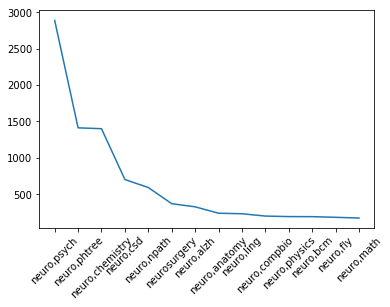

In [54]:
plt.plot(people_df['majorarea'].value_counts()[1:15])
plt.xticks(rotation = 45)

What is phtree??

In [56]:
num_spec_area = []
spec_area_people = people_df['area'].str.lower().str.split(",").values
for m in spec_area_people:
    num_spec_area.append(len(m))

Counter(num_spec_area)

Counter({1: 66724,
         2: 25720,
         3: 20266,
         4: 6202,
         5: 1818,
         6: 624,
         7: 222,
         8: 104,
         9: 62,
         10: 44,
         11: 16,
         12: 9,
         13: 7,
         14: 1,
         16: 1,
         19: 1})

In [60]:
round(people_df['area'].value_counts(normalize= True), 3)

-9                                                                                                         0.276
Clinical Psychology                                                                                        0.031
Neuroscience Biology                                                                                       0.010
Social Psychology                                                                                          0.005
Neuroscience                                                                                               0.004
Clinical Psychology, Social Psychology                                                                     0.004
Clinical Psychology, Developmental Psychology                                                              0.004
Developmental Psychology                                                                                   0.004
Industrial Psychology                                                                           

Again, missing value are substantial and.. and there exist 37,040 different combinations. For the purpose of further analysis, I think publication records + disseration topic should be used, rather than using this column.